In [34]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [35]:
date_cols = [
    'Auftragseingang', 
    'Auftragsende_SOLL',
    'AFO_Start_SOLL',
    'AFO_Ende_SOLL',
    'AFO_Start_IST',
    'AFO_Ende_IST'
]

data = pd.read_csv(
    '../data/processed/data_feature_zeit_3_gesamt.csv',
    parse_dates=date_cols,
    sep=',',
    low_memory=False
)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528238 entries, 0 to 1528237
Data columns (total 38 columns):
 #   Column                             Non-Null Count    Dtype         
---  ------                             --------------    -----         
 0   AuftragsID                         1528238 non-null  object        
 1   BauteilID                          1528238 non-null  int64         
 2   Bauteilbezeichnung                 1528238 non-null  object        
 3   Auftragseingang                    1528238 non-null  datetime64[ns]
 4   Priorität                          1528238 non-null  int64         
 5   Auftragsende_SOLL                  1528238 non-null  datetime64[ns]
 6   Arbeitsschritt                     1528238 non-null  int64         
 7   Arbeitsschrittbezeichnung          1528238 non-null  object        
 8   AFO_Start_SOLL                     1528238 non-null  datetime64[ns]
 9   AFO_Ende_SOLL                      1528238 non-null  datetime64[ns]
 10  AFO_St

In [37]:
df_cleaned = data.drop(columns=data.select_dtypes(include=["datetime", "object"]).columns)
df_cleaned.drop(columns=['Start_Delay_Arbeitszeit'], inplace=True)
df_cleaned.drop(columns=['End_Delay_Arbeitszeit'], inplace=True)
df_cleaned.drop(columns=['Wartezeit_vor_Beginn_Tage'], inplace=True)
df_cleaned.drop(columns=['Pufferzeit_geplant_Tage'], inplace=True)
df_cleaned.drop(columns=['Auftrags_Laufzeit_IST_Tage'], inplace=True)
df_cleaned.drop(columns=['Auftrags_Laufzeit_Abweichung_Tage'], inplace=True)
df_cleaned.drop(columns=['Auftrags_Laufzeit_SOLL_Tage'], inplace=True)
df_cleaned.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528238 entries, 0 to 1528237
Data columns (total 18 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   BauteilID                   1528238 non-null  int64  
 1   Priorität                   1528238 non-null  int64  
 2   Arbeitsschritt              1528238 non-null  int64  
 3   MaschinenID                 538654 non-null   float64
 4   Maschinenkapazität          538654 non-null   float64
 5   is_transport_ruesten        1528238 non-null  bool   
 6   AFO_Dauer_SOLL_Stunden      1528238 non-null  float64
 7   AFO_Dauer_IST_Stunden       1528238 non-null  float64
 8   AFO_Verspätung_Arbeitszeit  1528238 non-null  float64
 9   AFO_Erster_Schritt          1528238 non-null  int64  
 10  AFO_Letzter_Schritt         1528238 non-null  int64  
 11  AFO_Start_Wochentag_Num     1528238 non-null  int64  
 12  AFO_Start_Stunde            1528238 non-null  int64  
 1

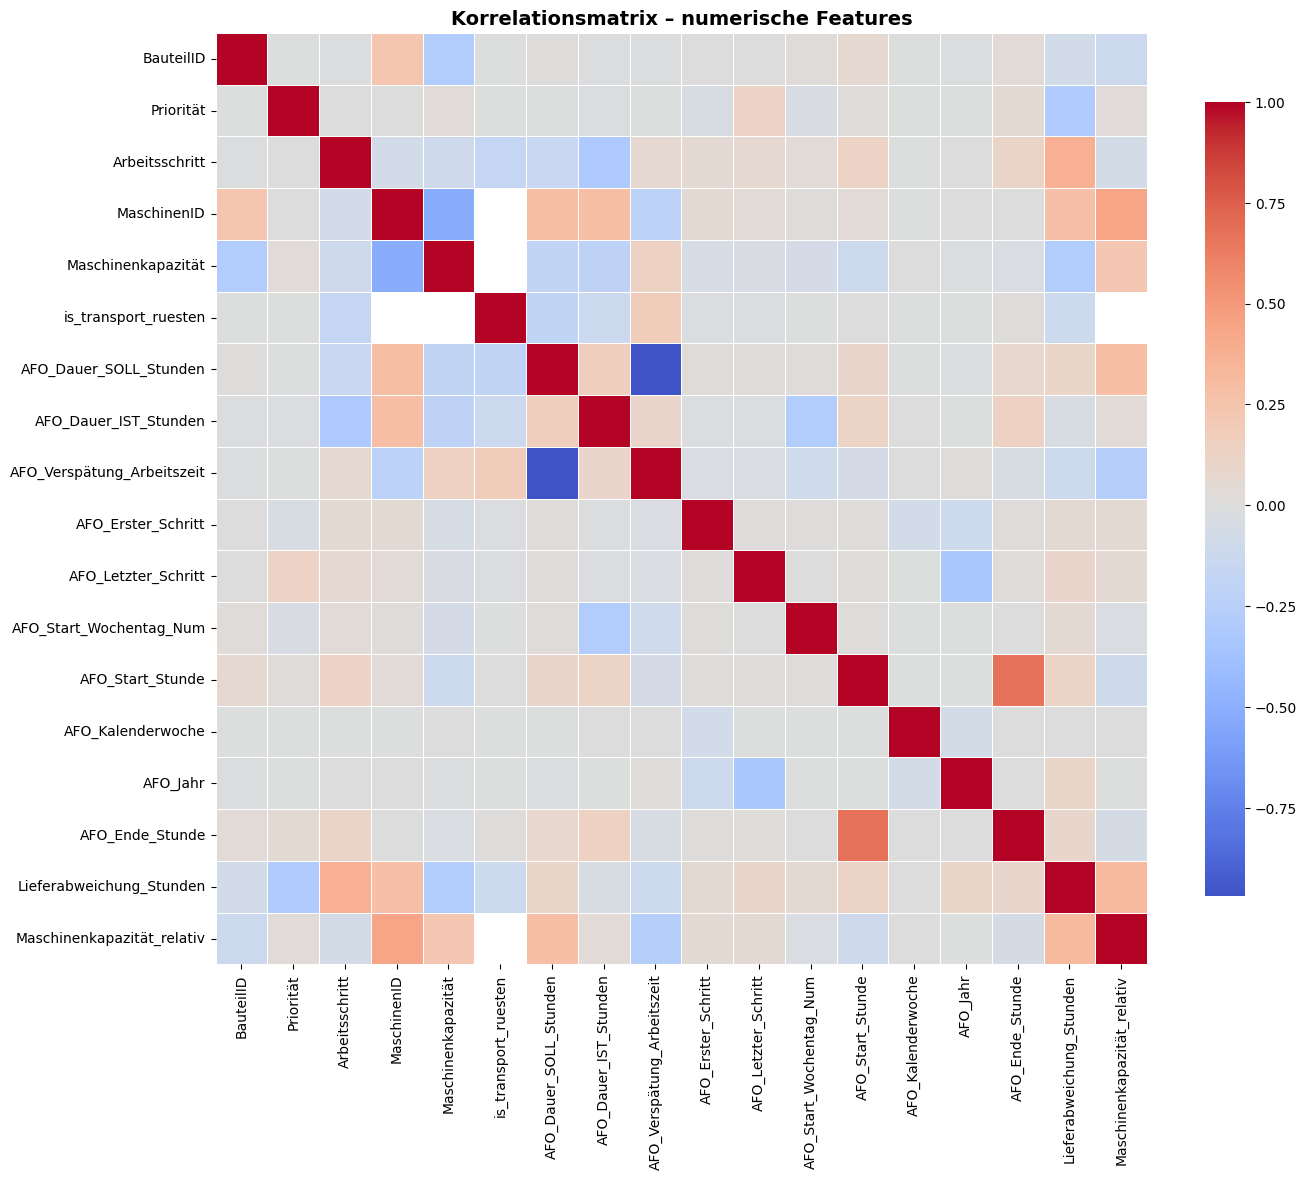

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ===============================
# 🧩 Korrelation berechnen
# ===============================

# Nur numerische Spalten (zur Sicherheit)
df_corr = df_cleaned.select_dtypes(include=["number", "bool"]).copy()

# Option: In bool → int konvertieren (sonst Farbe zu flach)
df_corr["is_transport_ruesten"] = df_corr["is_transport_ruesten"].astype(int)

# Korrelationsmatrix berechnen
corr_matrix = df_corr.corr(method="pearson")

# ===============================
# 🎯 Heatmap plotten
# ===============================
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    annot=False,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
)

plt.title("Korrelationsmatrix – numerische Features", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()



📊 Wichtigste Korrelationen mit Lieferabweichung_Stunden:
Lieferabweichung_Stunden      1.000000
Arbeitsschritt                0.374696
Maschinenkapazität_relativ    0.309704
MaschinenID                   0.272041
AFO_Start_Stunde              0.117897
AFO_Dauer_SOLL_Stunden        0.108891
AFO_Jahr                      0.101785
AFO_Letzter_Schritt           0.094379
AFO_Ende_Stunde               0.086124
AFO_Start_Wochentag_Num       0.056447
AFO_Erster_Schritt            0.053447
AFO_Kalenderwoche             0.007513
AFO_Dauer_IST_Stunden        -0.038260
BauteilID                    -0.076384
is_transport_ruesten         -0.108546
AFO_Verspätung_Arbeitszeit   -0.119836
Maschinenkapazität           -0.284041
Priorität                    -0.297421
Name: Lieferabweichung_Stunden, dtype: float64


/var/folders/mc/jb1nbgjx243512nh0dbf14km0000gn/T/ipykernel_18329/1681452924.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


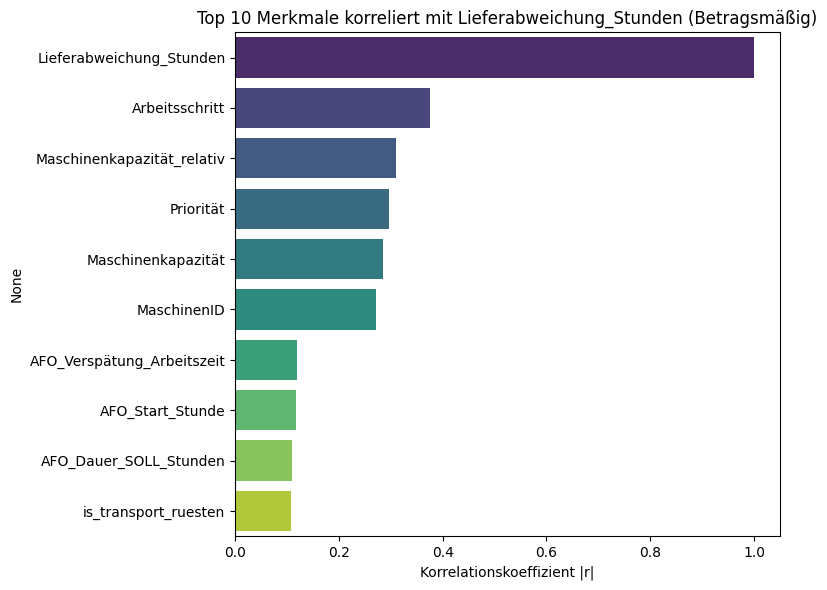

In [39]:
# Nur Korrelationen mit Zielvariable
target_corr = corr_matrix["Lieferabweichung_Stunden"].sort_values(ascending=False)

print("\n📊 Wichtigste Korrelationen mit Lieferabweichung_Stunden:")
print(target_corr)

# Plot der Top 10 positiven/negativen Korrelationen
plt.figure(figsize=(8,6))
sns.barplot(
    x=target_corr.abs().sort_values(ascending=False).head(10),
    y=target_corr.abs().sort_values(ascending=False).head(10).index,
    palette="viridis"
)
plt.title("Top 10 Merkmale korreliert mit Lieferabweichung_Stunden (Betragsmäßig)")
plt.xlabel("Korrelationskoeffizient |r|")
plt.tight_layout()
plt.show()


Top 20 Features für bivariate Analyse:
['Arbeitsschritt', 'Maschinenkapazität_relativ', 'Priorität', 'Maschinenkapazität', 'MaschinenID', 'AFO_Verspätung_Arbeitszeit', 'AFO_Start_Stunde', 'AFO_Dauer_SOLL_Stunden', 'is_transport_ruesten', 'AFO_Jahr', 'AFO_Letzter_Schritt', 'AFO_Ende_Stunde', 'BauteilID', 'AFO_Start_Wochentag_Num', 'AFO_Erster_Schritt', 'AFO_Dauer_IST_Stunden', 'AFO_Kalenderwoche']


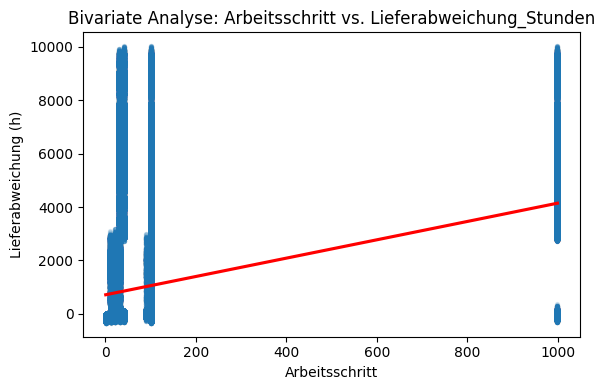

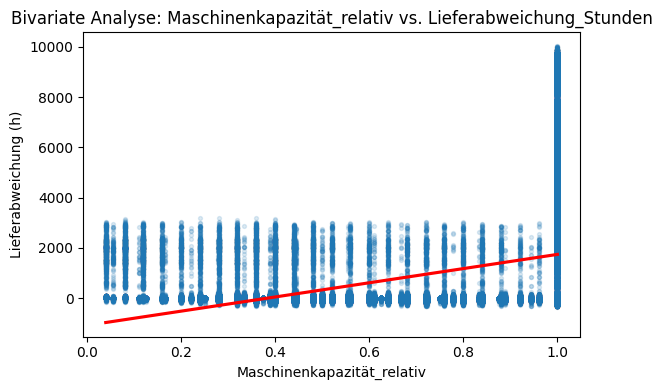

/var/folders/mc/jb1nbgjx243512nh0dbf14km0000gn/T/ipykernel_18329/310932386.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, y=target, palette="viridis")


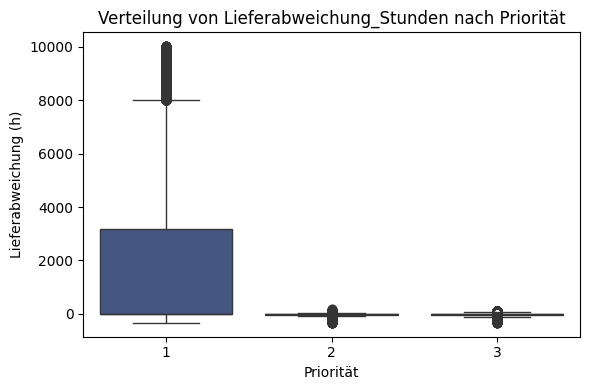

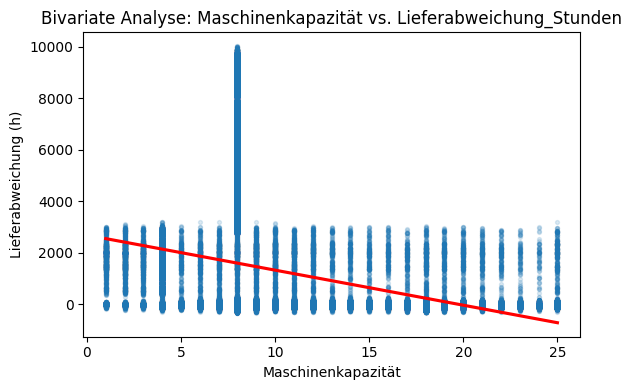

/var/folders/mc/jb1nbgjx243512nh0dbf14km0000gn/T/ipykernel_18329/310932386.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, y=target, palette="viridis")


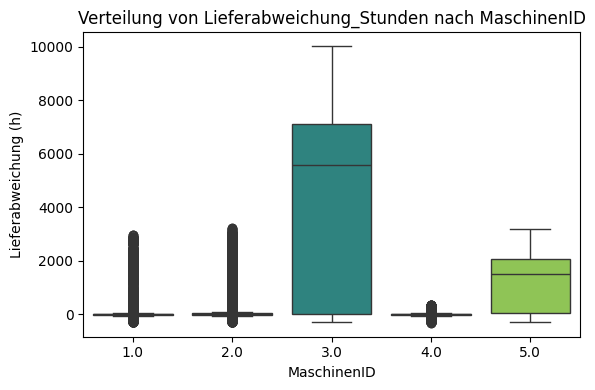

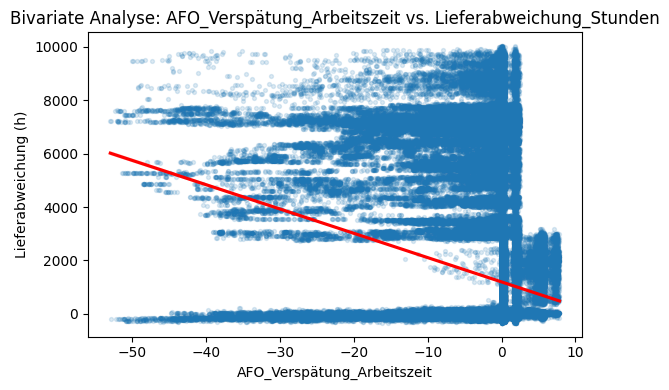

/var/folders/mc/jb1nbgjx243512nh0dbf14km0000gn/T/ipykernel_18329/310932386.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, y=target, palette="viridis")


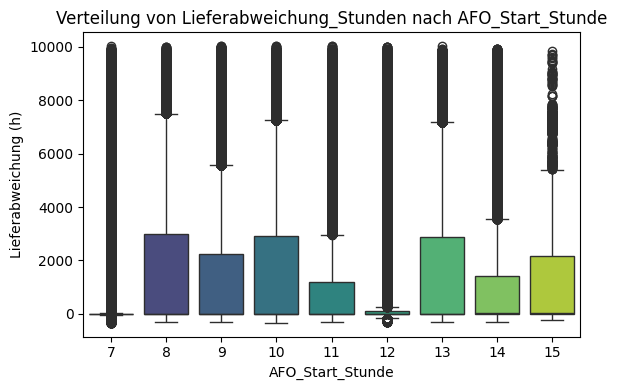

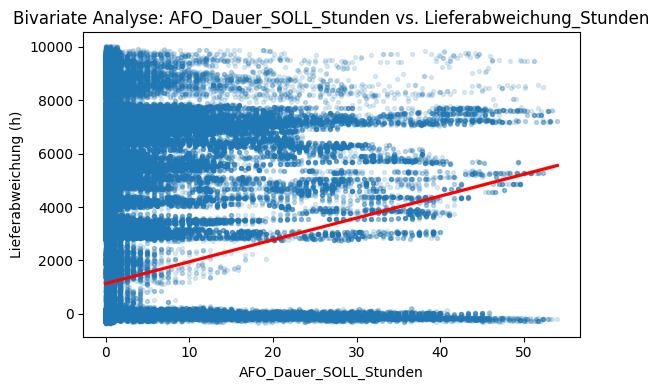

/var/folders/mc/jb1nbgjx243512nh0dbf14km0000gn/T/ipykernel_18329/310932386.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, y=target, palette="viridis")


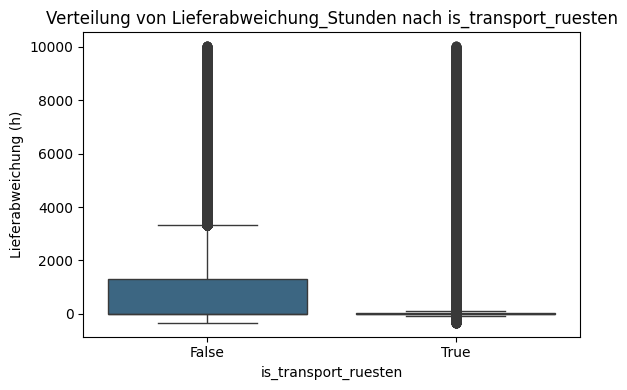

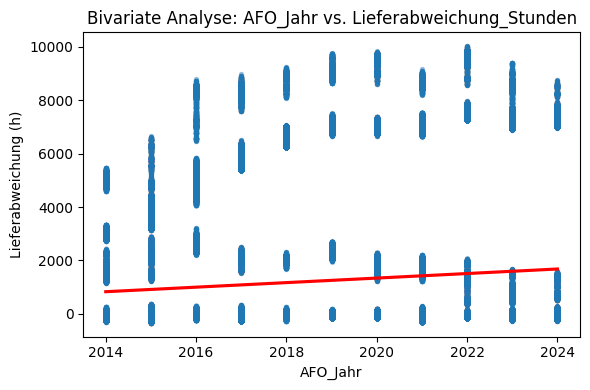

/var/folders/mc/jb1nbgjx243512nh0dbf14km0000gn/T/ipykernel_18329/310932386.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, y=target, palette="viridis")


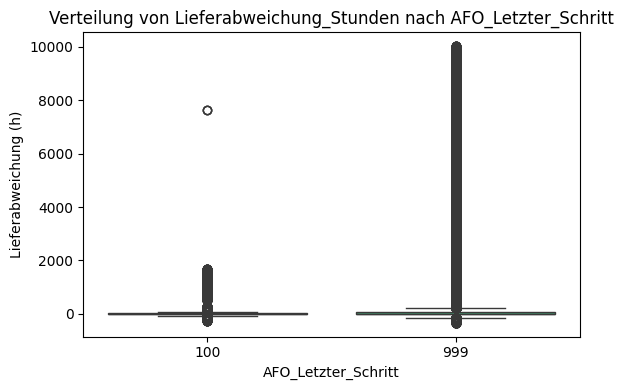

/var/folders/mc/jb1nbgjx243512nh0dbf14km0000gn/T/ipykernel_18329/310932386.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, y=target, palette="viridis")


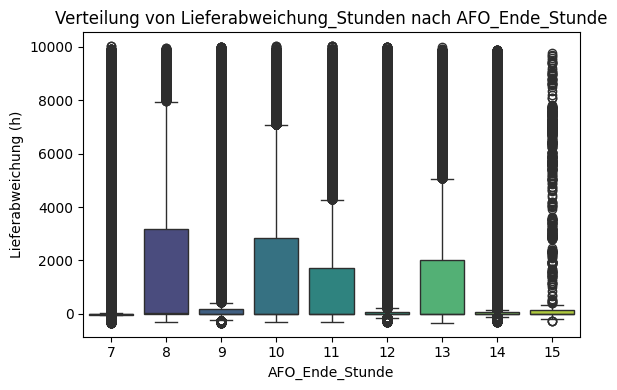

/var/folders/mc/jb1nbgjx243512nh0dbf14km0000gn/T/ipykernel_18329/310932386.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, y=target, palette="viridis")


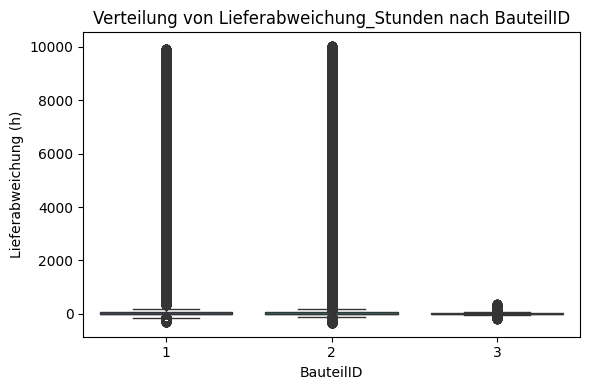

/var/folders/mc/jb1nbgjx243512nh0dbf14km0000gn/T/ipykernel_18329/310932386.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, y=target, palette="viridis")


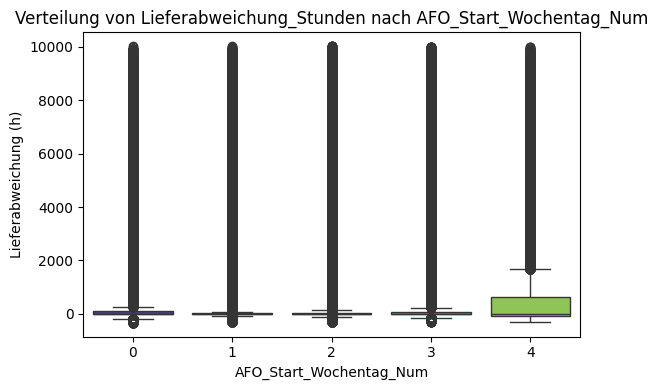

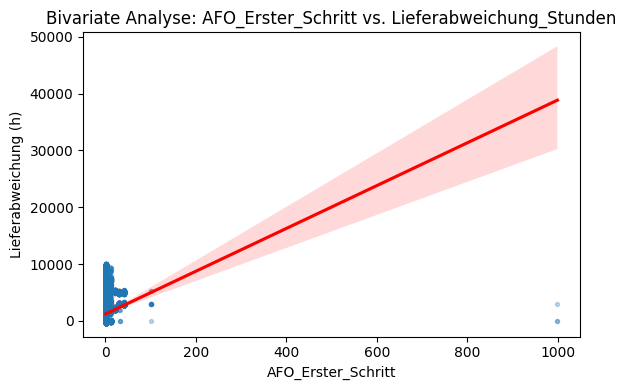

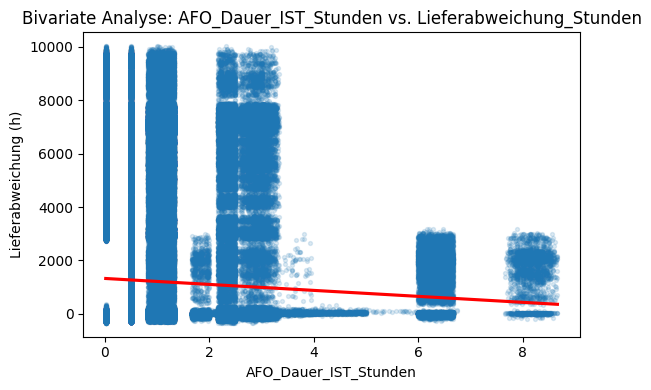

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ===============================
# 🎯 Zielvariable
# ===============================
target = "Lieferabweichung_Stunden"

# ===============================
# 📊 Top 20 korrelierte Features
# ===============================
corr_sorted = df_cleaned.corr(numeric_only=True)[target].abs().sort_values(ascending=False)
top_features = corr_sorted.drop(target).head(20).index.tolist()

print("Top 20 Features für bivariate Analyse:")
print(top_features)

# ===============================
# 🔍 Bivariate Analyse (automatisch)
# ===============================
for col in top_features:
    plt.figure(figsize=(6, 4))

    # Entscheide automatisch, ob Boxplot oder Scatter sinnvoll ist
    unique_vals = df_cleaned[col].nunique()

    # 🔹 Wenige Ausprägungen (z. B. bool, Kategorie) → Boxplot
    if unique_vals <= 10:
        sns.boxplot(data=df_cleaned, x=col, y=target, palette="viridis")
        plt.title(f"Verteilung von {target} nach {col}")
        plt.xlabel(col)
        plt.ylabel("Lieferabweichung (h)")

    # 🔸 Viele Ausprägungen → Scatter mit Regressionslinie
    else:
        sns.regplot(
            data=df_cleaned, x=col, y=target,
            scatter_kws={'alpha':0.15, 's':8},
            line_kws={"color":"red"},
            lowess=False  # lokale Glättung, fängt Nichtlinearität ein
        )
        plt.title(f"Bivariate Analyse: {col} vs. {target}")
        plt.xlabel(col)
        plt.ylabel("Lieferabweichung (h)")

    plt.tight_layout()
    plt.show()
